# COVID-19 Data Exploration 
## by Ahmed Maher

## Preliminary Wrangling

> This dataset includes COVID-19 cases per day and total cases and other information which may help us to find any relation between variable or What's going on across the different continent                        
 [source](https://ourworldindata.org/coronavirus-source-data) has 30116 rows after removing nulls value before nulls it was(31074 rows).<br>
 <p style="color:red;">
**this date from 2019-12-31 to 2020-07-18**
 </p>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("owid-covid-data.csv" )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31074 entries, 0 to 31073
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         31010 non-null  object 
 1   continent                        30809 non-null  object 
 2   location                         31074 non-null  object 
 3   date                             31074 non-null  object 
 4   total_cases                      30750 non-null  float64
 5   new_cases                        30750 non-null  float64
 6   total_deaths                     30750 non-null  float64
 7   new_deaths                       30750 non-null  float64
 8   total_cases_per_million          30686 non-null  float64
 9   new_cases_per_million            30686 non-null  float64
 10  total_deaths_per_million         30686 non-null  float64
 11  new_deaths_per_million           30686 non-null  float64
 12  total_tests       

In [5]:
interested_features = [
    "continent", "location", "date", "total_cases", "new_cases" , "total_deaths" , "new_deaths" , "total_cases_per_million"
    , "total_deaths_per_million" , "new_deaths_per_million" , "population" , "life_expectancy"
]

df = df[interested_features]

df.dropna(inplace=True)
df["date"] = pd.to_datetime(df["date"])
(df["date"].min() , df["date"].max() )

(Timestamp('2019-12-31 00:00:00'), Timestamp('2020-07-18 00:00:00'))

### What is the structure of your dataset?

> There are 31,074 entries in the dataset with 34 features  Most variables are numeric in nature 

### What is/are the main feature(s) of interest in your dataset?

> I interested in <br>
(continent, location, date, total_cases, new_cases  , total_deaths , new_deaths , total_cases_per_million   , total_deaths_per_million  , new_deaths_per_million  , population  , life_expectancy ) <br>
_since  they have a lower number of missing values which increase the reliability of our insights_


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `continent` which leads us to know where is the lower cases happen and I think the Arab World has the lower number of cases comparing with the foreign continent . Most of Arab word located on Africa and Asia <hr><br>
`date`   to know how number of cases per day distributed  <hr><br>
`total_cases`  which country has the most number of cases.  we can talk into our account the population to know if the country with high population help the virus to spread quickly. we can use this also to graph pie chart across different continent  <hr><br>         
`life_expectancy`to see    if there is a relationship between life_expectancy   and the spread of the viruses <hr><br>   
`new_deaths`      we can depict the line chart where the x-axis is the time and y-axis is the new_deaths  in the continent

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
life_expectancy = (df.groupby(["continent"])["life_expectancy"]
                   .mean()
                   .reset_index()
                   .sort_values("life_expectancy" , ascending = False)
                  )
 

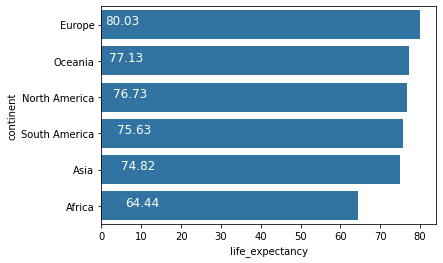

In [ ]:
# color = blue 
# it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color
base_color = sb.color_palette()[0]

sb.barplot(data = life_expectancy , y="continent" , x="life_expectancy" , color=base_color);


# put a text ( life_expectancy ) on bar 
locs, labels = plt.yticks()
count = 0

for loc, label in zip(locs, labels):
    plt.text(loc + 1 ,
             count, 
             "{0:.2f}".format(life_expectancy.query("continent == @label.get_text()")["life_expectancy"].values[0]) ,
             color = "w"  ,
             fontsize=12)
    count +=1



> depict bar chart for life_expectancy at each country to investigate if there is a kind of relationship between this variable and death per day or other variables 
- we can see that Africa has the lowest life_expectancy where Europ has the highest life_expectancy

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!